## Conceptual few-shot evaluation: reports generation

This script processes the results of `evaluations/evaluate.py` evaluation and transforms it into the reported results.

In [223]:
import pandas as pd
df = pd.read_csv("bootstrapped_evaluation.tsv", sep="\t", names=["model", "dataset", "prompt", "random_demos", "informative_demos", "difference"])

df

,model,dataset,prompt,random_demos,informative_demos,difference
0,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,GPT-3 style,0.38,0.49,0.11
1,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,GPT-3 style,0.44,0.40,-0.04
2,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,GPT-3 style,0.49,0.52,0.03
3,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,GPT-3 style,0.41,0.51,0.10
4,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,GPT-3 style,0.48,0.40,-0.08
...,...,...,...,...,...,...
32295,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_affirmative,0.00,0.00,0.00
32296,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_affirmative,0.00,0.00,0.00
32297,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_affirmative,0.00,0.00,0.00
32298,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_affirmative,0.00,0.00,0.00


In [224]:
df.groupby(["model", "dataset", "prompt"]).mean().tail(10)

random_demos  \
model                                        dataset               prompt                                        
trained_models/SQuAD+SQAD_random_base_ch5000 hotpot_qa/fullwiki    generate_answer_affirmative        0.136065   
                                                                   generate_answer_interrogative      0.167993   
                                             openbookqa/additional choices                            0.167551   
                                                                   choose_an_answer_with_options      0.181774   
                                                                   only_options                       0.183998   
                                                                   pick_answer_with_options           0.173585   
                                                                   pick_using_id                      0.195200   
                                                                   which_correct                      0.217218   
                                                                   which_correct_inverse              0.111227   
                                             worldtree             no template                        0.263748   

                                                                                                  informative_demos  \
model                                        dataset               prompt                                             
trained_models/SQuAD+SQAD_random_base_ch5000 hotpot_qa/fullwiki    generate_answer_affirmative             0.135997   
                                                                   generate_answer_interrogative           0.158403   
                                             openbookqa/additional choices                                 0.166908   
                                                                   choose_an_answer_with_options           0.178639   
                                                                   only_options                            0.185941   
                                                                   pick_answer_with_options                0.170651   
                                                                   pick_using_id                           0.193200   
                                                                   which_correct                           0.217182   
                                                                   which_correct_inverse                   0.109852   
                                             worldtree             no template                             0.268969   

                                                                                                  difference  
model                                        dataset               prompt                                     
trained_models/SQuAD+SQAD_random_base_ch5000 hotpot_qa/fullwiki    generate_answer_affirmative     -0.000069  
                                                                   generate_answer_interrogative   -0.009590  
                                             openbookqa/additional choices                         -0.000643  
                                                                   choose_an_answer_with_options   -0.003136  
                                                                   only_options                     0.001942  
                                                                   pick_answer_with_options        -0.002934  
                                                                   pick_using_id                   -0.002000  
                                                                   which_correct                   -0.000035  
                                                                   which_correct_inverse           -0.001375  
                                             worldtree             no template 

In [226]:
max_vals = df.groupby(["model", "dataset", "prompt"]).mean()["informative_demos"].groupby(["model", "dataset"]).idxmax().tolist()

In [227]:
# best-performing templates per model:
max_vals

[('allenai/mtk-instruct-3b-def-pos', 'glue/mnli', 'MNLI crowdsource'),
 ('allenai/mtk-instruct-3b-def-pos',
  'hotpot_qa/fullwiki',
  'generate_answer_interrogative'),
 ('allenai/mtk-instruct-3b-def-pos', 'openbookqa/additional', 'which_correct'),
 ('allenai/mtk-instruct-3b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-11b-def-pos', 'glue/mnli', 'does it follow that'),
 ('allenai/tk-instruct-11b-def-pos', 'openbookqa/additional', 'choices'),
 ('allenai/tk-instruct-11b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-3b-def-pos', 'glue/mnli', 'always/sometimes/never'),
 ('allenai/tk-instruct-3b-def-pos',
  'hotpot_qa/fullwiki',
  'generate_answer_affirmative'),
 ('allenai/tk-instruct-3b-def-pos',
  'openbookqa/additional',
  'which_correct_inverse'),
 ('allenai/tk-instruct-3b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-base-def-pos', 'glue/mnli', 'must be true'),
 ('allenai/tk-instruct-base-def-pos',
  'hotpot_qa/fullwiki',
  'generate_answ

In [228]:
max_info_df = df[df.apply(lambda row: tuple(row[["model", "dataset", "prompt"]]) in max_vals, axis=1)]
max_info_df

,model,dataset,prompt,random_demos,informative_demos,difference
1000,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.54,0.49,-0.05
1001,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.51,0.58,0.07
1002,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.56,0.56,0.00
1003,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.60,0.53,-0.07
1004,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.56,0.48,-0.08
...,...,...,...,...,...,...
32095,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_interrogative,0.00,0.01,0.01
32096,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_interrogative,0.00,0.00,0.00
32097,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_interrogative,0.00,0.00,0.00
32098,trained_models/AQA_hard_3b_ch1900,hotpot_qa/fullwiki,generate_answer_interrogative,0.02,0.00,-0.02


In [229]:
max_info_df.model.unique()

array(['trained_models/SQuAD+SQAD_hard_base_ch2000',
       'trained_models/SQuAD+SQAD_random_base_ch5000',
       'trained_models/AQA+SQAD_random_large_ch6000',
       'gaussalgo/mt5-large-priming-QA_en-cs',
       'allenai/tk-instruct-base-def-pos',
       'allenai/tk-instruct-large-def-pos',
       'allenai/tk-instruct-3b-def-pos',
       'allenai/mtk-instruct-3b-def-pos', 'bigscience/T0_3B',
       'bigscience/T0pp', 'allenai/tk-instruct-11b-def-pos',
       'trained_models/AQA_hard_3b_ch1900'], dtype=object)

#### Join of random-eval and informative-eval results


In [230]:
random_portion_df = max_info_df.copy()
del random_portion_df["informative_demos"]
random_portion_df["acc"] = random_portion_df["random_demos"]
random_portion_df["type"] = "random"

del random_portion_df["random_demos"]

info_portion_df = max_info_df.copy()
del info_portion_df["random_demos"]
info_portion_df["acc"] = info_portion_df["informative_demos"]
info_portion_df["type"] = "info"

del info_portion_df["informative_demos"]

joint_df = pd.concat([random_portion_df, info_portion_df])

In [231]:
joint_df.head(5)

,model,dataset,prompt,difference,acc,type
1000,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,-0.05,0.54,random
1001,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.07,0.51,random
1002,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,0.00,0.56,random
1003,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,-0.07,0.60,random
1004,trained_models/SQuAD+SQAD_hard_base_ch2000,glue/mnli,guaranteed/possible/impossible,-0.08,0.56,random


## Reported plots generation

Data transformations and per-dataset plot generatio


In [239]:
plotted_model_names = {"allenai/tk-instruct-base-def-pos": "Tk-instruct (480M)",
                       "trained_models/AQA+SQAD_random_large_ch6000": "Tk-QA-random (1.3B)",
                       "gaussalgo/mt5-large-priming-QA_en-cs": "Tk-QA-info (1.3B)",
                       "allenai/tk-instruct-large-def-pos": "Tk-instruct (1.3B)",
                       # "trained_models/AQA_hard_3b_ch1900": "Tk-QA-info (3B)",
                       "allenai/tk-instruct-3b-def-pos": "Tk-instruct (3B)",
                       "allenai/mtk-instruct-3b-def-pos": "mTk-instruct (3B)",
                       "bigscience/T0_3B": "T0 (3B)",
                       "bigscience/T0pp": "T0 (11B)",
                       "allenai/tk-instruct-11b-def-pos": "Tk-instruct (11B)"}

plotted_df = pd.DataFrame()

for current_id, new_id in plotted_model_names.items():
    orig_df = joint_df[joint_df["model"] == current_id]
    new_df = orig_df.copy()
    new_df["model"] = new_id

    plotted_df = pd.concat([plotted_df, new_df])

plotted_df.loc[plotted_df["type"] == "info", "type"] = "shared concept"

plotted_df["Demonstrations selection"] = plotted_df["type"]
del plotted_df["type"]

plotted_df["ROUGE"] = plotted_df["acc"]
del plotted_df["acc"]

# not-a-heldout-task
updated_idx = plotted_df[(plotted_df["dataset"].isin(("openbookqa/additional", "hotpot_qa/fullwiki"))) & (plotted_df["model"].apply(lambda name: "Tk-instruct" in name))].index
plotted_df.loc[updated_idx, "model"] = plotted_df.loc[updated_idx, "model"].apply(lambda name: "$^*$"+name)

updated_idx = plotted_df[(plotted_df["dataset"].isin(("openbookqa/additional", "hotpot_qa/fullwiki"))) & (plotted_df["model"].apply(lambda name: "T0" in name))].index
plotted_df.loc[updated_idx, "model"] = plotted_df.loc[updated_idx, "model"].apply(lambda name: "$^*$"+name)


plotted_df.head()

,model,dataset,prompt,difference,Demonstrations selection,ROUGE
11200,Tk-instruct (480M),glue/mnli,must be true,-0.04,random,0.58
11201,Tk-instruct (480M),glue/mnli,must be true,-0.08,random,0.61
11202,Tk-instruct (480M),glue/mnli,must be true,-0.11,random,0.58
11203,Tk-instruct (480M),glue/mnli,must be true,0.07,random,0.51
11204,Tk-instruct (480M),glue/mnli,must be true,-0.01,random,0.58


In [254]:
import seaborn as sns
sns.set(rc={'figure.figsize': (6, 5)})
sns.set(style="whitegrid")
sns.set_palette("muted")


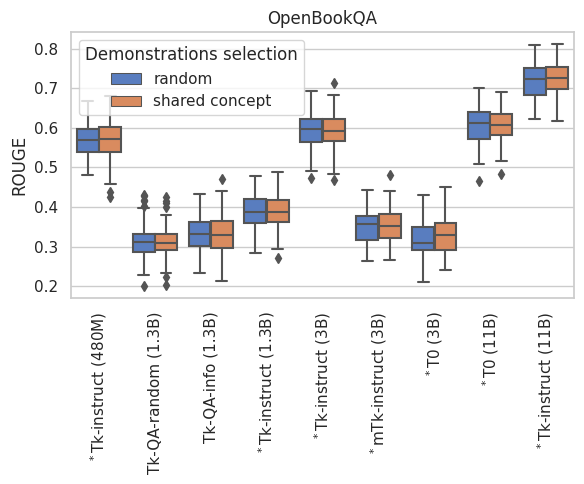

In [255]:
plt.xticks(rotation=90)
plt.title("OpenBookQA")

g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "openbookqa/additional"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)])
# g.set(xticklabels=[]) 
g.set(xlabel=None)

# plt.legend([],[], frameon=False)
plt.tight_layout()

plt.savefig("openbookqa_boxes.pdf", format="pdf")

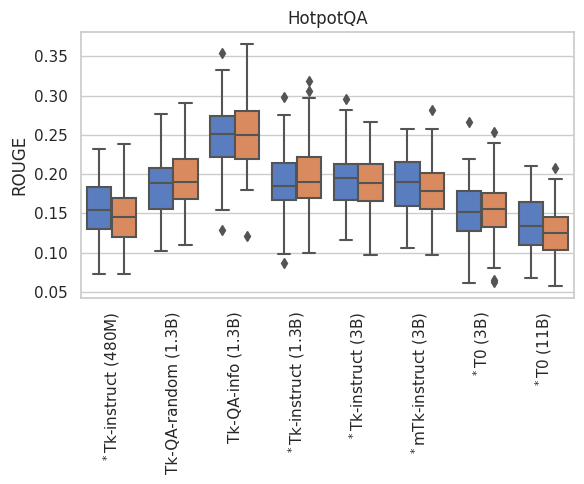

In [256]:
plt.xticks(rotation=90)
plt.title("HotpotQA")
g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "hotpot_qa/fullwiki"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)])
# g.set(xticklabels=[])
g.set(xlabel=None)
plt.legend([],[], frameon=False)

plt.tight_layout()

plt.savefig("hotpotqa_boxes.pdf", format="pdf")

In [257]:
sns.set(rc={'figure.figsize': (6, 5)})
sns.set(style="whitegrid")
sns.set_palette("muted")

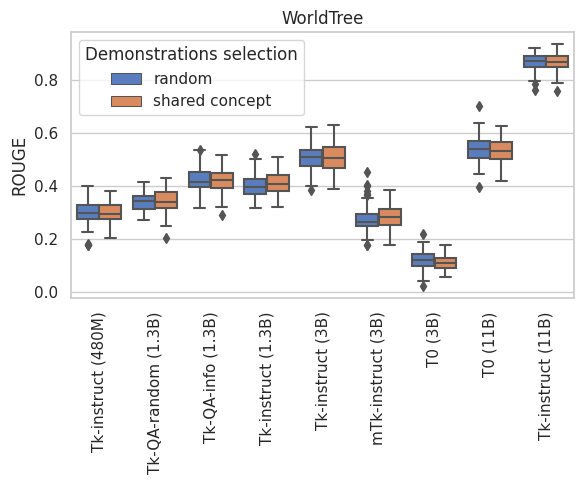

In [258]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)

plt.title("WorldTree")

g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "worldtree"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)])
g.set(xlabel=None)
# plt.legend([],[], frameon=False)

plt.gcf().subplots_adjust(bottom=0.25)
plt.tight_layout()

plt.savefig("worldtree_boxes.pdf", format="pdf")

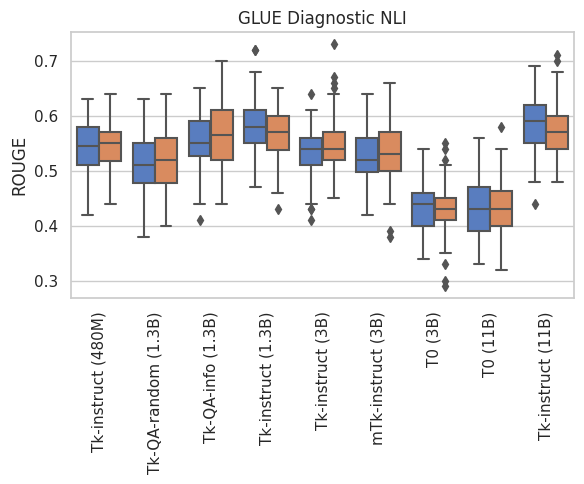

In [259]:
plt.xticks(rotation=90)
plt.title("GLUE Diagnostic NLI")

# sns.set(rc={'figure.figsize': (10, 7)})
# plt.tight_layout()
g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "glue/mnli"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)])
g.set(xlabel=None)
plt.tight_layout()

plt.legend([],[], frameon=False)
plt.savefig("glue_boxes.pdf", format="pdf")